# Breakdown of science cases according to filter bandpass

The goal of this notebook is to explore what filter bandpasses were requested by different science cases. 

In [3]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
import json
import config_utils
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column

# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

The region of sky and filter choices requested by each science case are described in the file config/rgps_survey_regions.json, so we load that here.  

In [21]:
config = config_utils.read_config(path.join(root_dir, 'config', 'rgps_science_cases.json'))

opt_elements = ['F062', 'F087', 'F106', 'F129', 'F146', 'F158', 'F184', 'F213', 'P127', 'G150']

## How many science cases asked for single versus multiple filters?

Since the requested survey regions are recorded on a per filter basis, we can simply count the number of science cases that requested one or more filters.  We can also distinguish between the science cases requested by the community and those proposed by committee members. 

In [22]:
# Count of the number of community contributed science cases requesting 1, 2, 3, ...more filters
case_count = np.zeros(len(opt_elements)+1)
cases = {n: [] for n in range(1,len(opt_elements)+1,1)}

for author, info in config.items():
    if info['ready_for_use'] and 'Member' not in info['comment']:
        nf = 0
        for key in opt_elements:
            if key in info.keys():
                nf += 1
        case_count[nf] += 1
        cases[nf].append(author)

print('Community WP/SP:')
for nf in range(1,9,1):
    if len(cases[nf]) > 0:
        print('Science cases requesting ' + str(nf) + ' filter(s): ' + ' '.join(cases[nf]))

# Count the number of committee member science cases requesting different filters
member_count = np.zeros(len(opt_elements)+1)
member_cases = {n: [] for n in range(1,len(opt_elements)+1,1)}

for author, info in config.items():
    if info['ready_for_use'] and 'Member' in info['comment']:
        nf = 0
        for key in opt_elements:
            if key in info.keys():
                nf += 1
        member_count[nf] += 1
        member_cases[nf].append(author)

print('Committee members:')
for nf in range(1,9,1):
    if len(member_cases[nf]) > 0:
        print('Science cases requesting ' + str(nf) + ' filter(s): ' + ' '.join(member_cases[nf]))

Community WP/SP:
Science cases requesting 1 filter(s): Paladini Paladini2 Benecchi Werner DAmmando Minniti2 Globular_Clusters Open_Clusters VVV_keyholes_1st_priority VVV_keyholes_2nd_priority Lim3_grism_targets Hillenbrand Gramze Bonito Pal
Science cases requesting 2 filter(s): Kruszynska Anderson Freeman Rich Ivanov
Science cases requesting 3 filter(s): Zari Villasenor Minniti Smith De_Furio Baravalle Morihana1 Wang Lucas Lim2 Gallart Kuhn Minniti_GCs Saito
Science cases requesting 4 filter(s): Hunt Lim1 Navarro Carey2 Rich2 Sabin
Science cases requesting 6 filter(s): Bahramian Carey1
Science cases requesting 8 filter(s): Lodieu2
Committee members:
Science cases requesting 3 filter(s): Drew De_Furio2
Science cases requesting 4 filter(s): Schlafly Zucker De
Science cases requesting 6 filter(s): Carey


Text(0.5, 1.0, 'Plot of the number of science cases requesting N filter bandpasses')

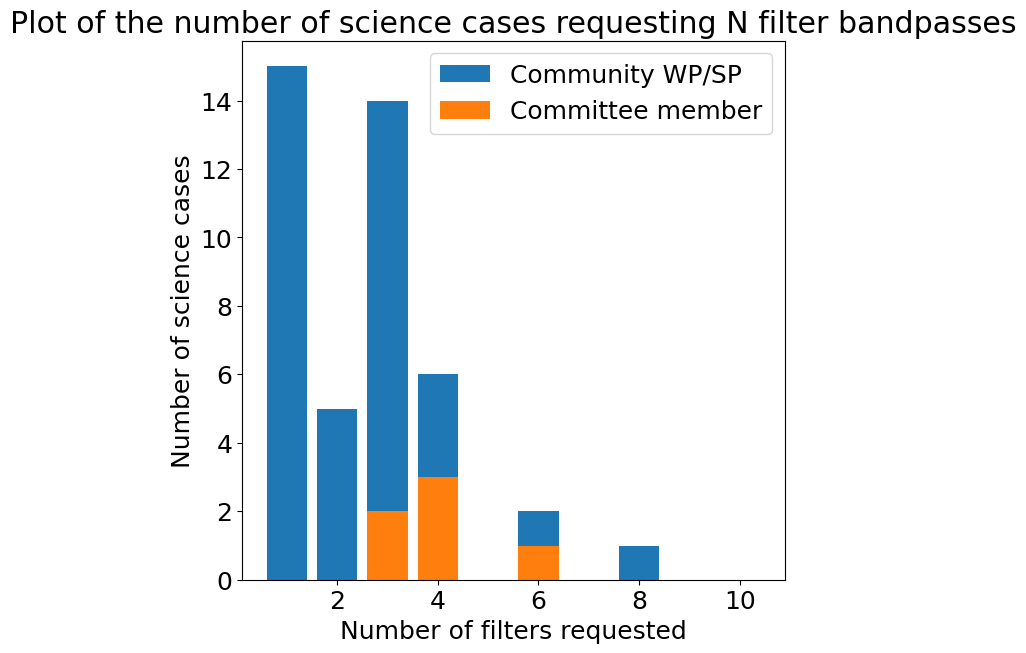

In [23]:
fig = plt.figure(1,(7,7))

plt.bar(np.arange(1,len(opt_elements)+1,1), case_count[1:], label='Community WP/SP')
plt.bar(np.arange(1,len(opt_elements)+1,1), member_count[1:], label='Committee member')

plt.xlabel('Number of filters requested')
plt.ylabel('Number of science cases')
plt.legend()

plt.title('Plot of the number of science cases requesting N filter bandpasses')

## Breakdown of the filter bandpasses requested

Now let's look at the breakdown of which filters, grism and prism were requested the most.

In [24]:
# Count for community contributed science cases
nvotes = [0]*len(opt_elements)

for author, info in config.items():
    if info['ready_for_use'] and 'Member' not in info['comment']:
        for i, key in enumerate(opt_elements):
            if key in info.keys():
                nvotes[i] += 1

# Count for the committee members science cases
com_nvotes = [0]*len(opt_elements)

for author, info in config.items():
    if info['ready_for_use'] and 'Member' in info['comment']:
        for i, key in enumerate(opt_elements):
            if key in info.keys():
                com_nvotes[i] += 1

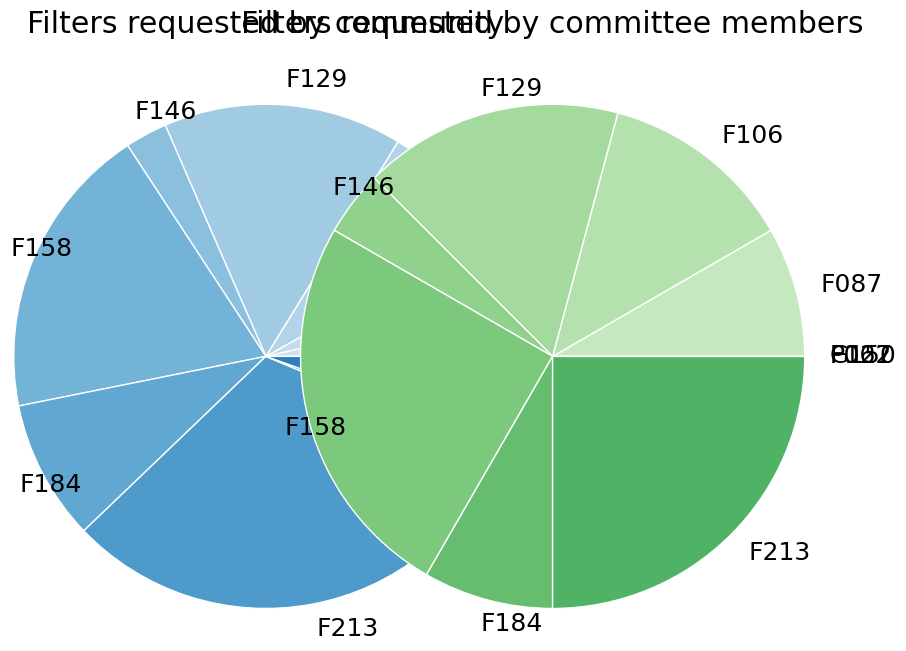

In [25]:
fig, axs = plt.subplots(1,2)
plt.subplots_adjust(left=0.0, bottom=0.1, right=1.0, top=0.3, wspace=0.0, hspace=0.0)

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(nvotes)))

axs[0].pie(nvotes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
      labels=opt_elements)
axs[0].set_title('Filters requested by community', y=2.0)


colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(com_nvotes)))

axs[1].pie(com_nvotes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
      labels=opt_elements)
axs[1].set_title('Filters requested by committee members', y=2.0)

plt.tight_layout()
plt.savefig(path.join(root_dir, 'optical_elements', 'filter_preferences.png'))

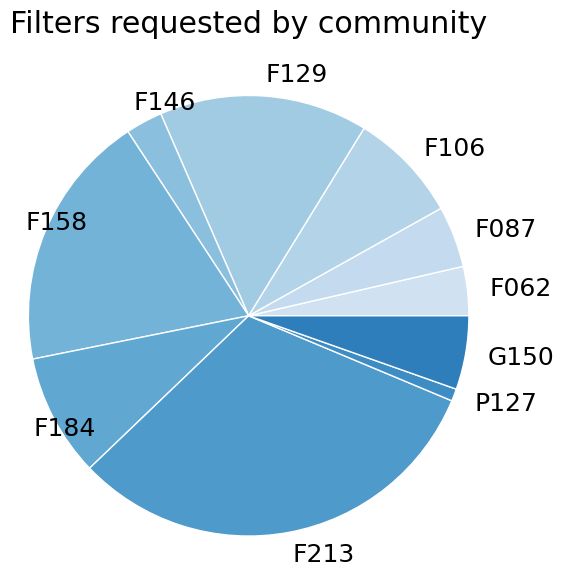

In [26]:
fig, axs = plt.subplots(1,1, figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.5, wspace=0.0, hspace=0.0)

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(nvotes)))

axs.pie(nvotes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
      labels=opt_elements)
axs.set_title('Filters requested by community', y=2.0)
plt.rcParams.update({'font.size': 18})

plt.tight_layout()
plt.savefig(path.join(root_dir, 'optical_elements', 'filter_preferences.png'))

Text(0.5, 1.0, 'Number of science cases requesting each optical element')

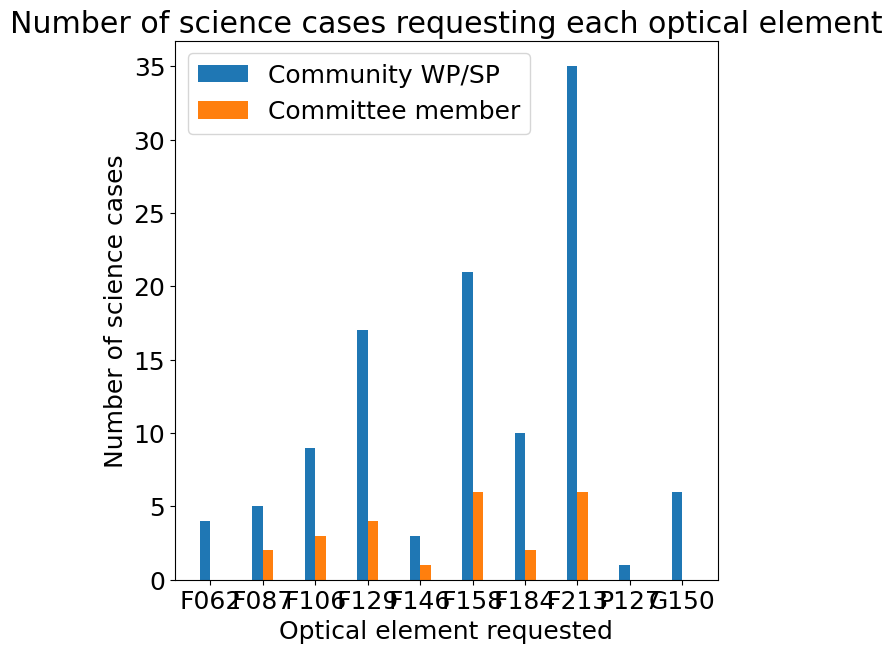

In [27]:
fig = plt.figure(1,(7,7))

plt.bar(np.arange(0,len(opt_elements),1)-0.1, nvotes, width=0.2, label='Community WP/SP')
plt.bar(np.arange(0,len(opt_elements),1)+0.1, com_nvotes, width=0.2, label='Committee member')

plt.xlabel('Optical element requested')
plt.ylabel('Number of science cases')
plt.xticks(ticks=np.arange(0,len(opt_elements),1), labels=opt_elements)

plt.legend()

plt.title('Number of science cases requesting each optical element')

Provide a listing of the science cases that request specific optics:

In [28]:
def get_science_cases_for_optic(config, optic):
    cases = {}

    print('Science cases requesting optic ' + optic)
    for author, info in config.items():
        if info['ready_for_use'] and 'Member' not in info['comment']:
            if optic in info.keys():
                cases[author] = info
                print(author)
    return cases

In [29]:
# List out spectroscopic cases
cases = get_science_cases_for_optic(config, 'P127')
cases = get_science_cases_for_optic(config, 'G150')

Science cases requesting optic P127
Rich2
Science cases requesting optic G150
Anderson
Lim1
Rich2
Lim3_grism_targets
Hillenbrand
Pal
